In [1]:
from src.horizon import *


## Import Horizons 

The following file is a bulk horizon export from OpendTect for the F3 project.
Under horizons, we have different ways of loading horizon data. Currently, we can just import bulk horizons files from OD. The data can come either in spatial coordinates (XYT UTM) or in inline/xline/time (ixt).

We specify where the data comes from (`origin`), and its format (spatial or inline/xline)

In [2]:
horizons_file = '../data/Horizons/Horizons_3D_all.dat'

horizons = Horizons()
params = {'origin': 'OpendTect', 'spatial': True,'il_xl': True} # We specify what 
horizons.load_horizons(horizons_file, params)

We have return a horizons Object, that holds the different loaded horizons from the file. We can look at the name of the loaded horizons by looking at `horizons.keys`. We can also access to a dictionary that holds all thed data, where the keys are the horizon names, and the values are the numpy arrays, by using `horizons.horizon_xyt`. If the data was in in `ixt` format, then, we use `horizons.horizon_ixt`

In [3]:
horizons.horizons_ixt

{'FS4': array([[ 104.        ,  104.        ,  104.        , ...,  747.        ,
          747.        ,  747.        ],
        [ 303.        ,  304.        ,  305.        , ..., 1245.        ,
         1246.        , 1247.        ],
        [1125.61237812, 1125.49293041, 1125.32806396, ...,  735.60470343,
          735.80241203,  735.75532436]]),
 'FS7': array([[ 103.        ,  103.        ,  103.        , ...,  747.        ,
          747.        ,  747.        ],
        [ 303.        ,  304.        ,  305.        , ..., 1245.        ,
         1246.        , 1247.        ],
        [1025.46727657, 1023.77665043, 1022.99356461, ...,  514.57375288,
          514.84674215,  515.03908634]]),
 'FS8': array([[ 105.        ,  105.        ,  105.        , ...,  747.        ,
          747.        ,  747.        ],
        [ 303.        ,  304.        ,  305.        , ..., 1245.        ,
         1246.        , 1247.        ],
        [ 858.64162445,  858.75165462,  858.88260603, ...,  493

We can also access to an specific horizon by using `.get_horizon` method.


In [4]:
fs8 = horizons.get_horizon('FS8',kind='both')

We can additionally plot a horizon. For that we apply a gridding operation under the hood. The gridding parameters can be specified.

/home/ragnarock/.local/lib/python3.8/site-packages/src-0.0.0-py3.8.egg/src/horizon.py:129: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
No handles with labels found to put in legend.


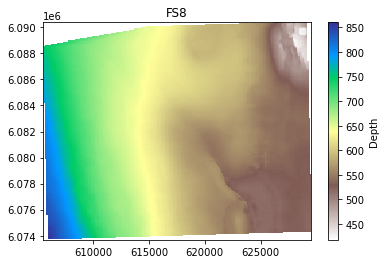

In [5]:
fs8.plot_horizon(kind='xyt')

We can also extract seismic amplitudes or attributes using a horizon. 
First, we need to import the seismic. 

In [7]:
seismic_file = '../data/F3.sgy'
seismic = Seismic() # Create the seismic obj
seismic.load_seismic(seismic_file)

In [20]:
fs8.extract_seismic(seismic,method='spl',attribute='seismic')

array([[  105.        ,   105.        ,   105.        , ...,
          747.        ,   747.        ,   747.        ],
       [  303.        ,   304.        ,   305.        , ...,
         1245.        ,  1246.        ,  1247.        ],
       [  858.64162445,   858.75165462,   858.88260603, ...,
          493.62459779,   494.35535073,   495.01916766],
       [-1601.68892728,  -664.42410583,  -349.52991599, ...,
         -681.83387843, -1220.76551759, -1390.17146753]])

/home/ragnarock/.local/lib/python3.8/site-packages/src-0.0.0-py3.8.egg/src/horizon.py:129: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(X, Y, Z, cmap=cmap)
No handles with labels found to put in legend.


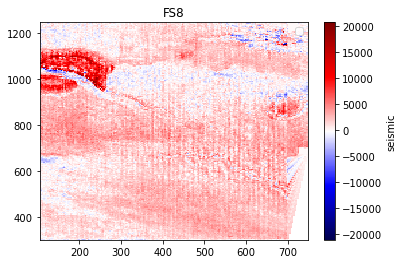

In [21]:
fs8.plot_horizon(kind='attribute',attribute='seismic')

In [22]:
fs8.extract_seismic(seismic,method='spl',attribute='envelope')

array([[ 105.        ,  105.        ,  105.        , ...,  747.        ,
         747.        ,  747.        ],
       [ 303.        ,  304.        ,  305.        , ..., 1245.        ,
        1246.        , 1247.        ],
       [ 858.64162445,  858.75165462,  858.88260603, ...,  493.62459779,
         494.35535073,  495.01916766],
       [1918.71988406, 1968.34847784, 1169.80978405, ..., 3516.02586746,
        6994.95679466, 6619.54867751]])

/home/ragnarock/.local/lib/python3.8/site-packages/src-0.0.0-py3.8.egg/src/horizon.py:129: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(X, Y, Z, cmap=cmap)
No handles with labels found to put in legend.


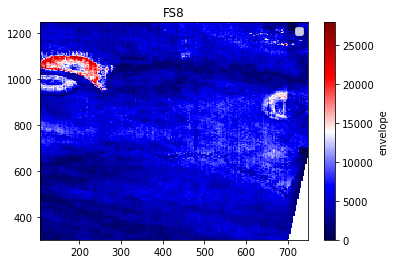

In [23]:
fs8.plot_horizon(kind='attribute',attribute='envelope')